In [1]:
# Importing Libraries
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt  

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])

df.drop(0, inplace = True)
df.reset_index(inplace = True)
df.drop(columns = 'index', inplace = True)

df['job_skills'] = df['job_skills'].apply(lambda skillset: ast.literal_eval(skillset) if pd.notna(skillset) else skillset)

In [2]:
df.head()

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
0,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,"[r, python, sql, nosql, power bi, tableau]","{'analyst_tools': ['power bi', 'tableau'], 'pr..."
1,Data Engineer,"Data Engineer/Scientist/Analyst, Mid or Senior...","Berlin, Germany",via LinkedIn,Full-time,False,Germany,2023-10-10 13:14:55,False,False,Germany,None,NaN,NaN,ALPHA Augmented Services,"[python, sql, c#, azure, airflow, dax, docker,...","{'analyst_tools': ['dax'], 'cloud': ['azure'],..."
2,Data Engineer,LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...,"San Antonio, TX",via Diversity.com,Full-time,False,"Texas, United States",2023-07-04 13:01:41,True,False,United States,None,NaN,NaN,Southwest Research Institute,"[python, c++, java, matlab, aws, tensorflow, k...","{'cloud': ['aws'], 'libraries': ['tensorflow',..."
3,Data Engineer,Data Engineer- Sr Jobs,"Washington, DC",via Clearance Jobs,Full-time,False,Sudan,2023-08-07 14:29:36,False,False,Sudan,None,NaN,NaN,Kristina Daniel,"[bash, python, oracle, aws, ansible, puppet, j...","{'cloud': ['oracle', 'aws'], 'other': ['ansibl..."
4,Data Engineer,GCP Data Engineer,Anywhere,via ZipRecruiter,Contractor and Temp work,True,Georgia,2023-11-07 14:01:59,False,False,United States,None,NaN,NaN,smart folks inc,"[python, sql, gcp]","{'cloud': ['gcp'], 'programming': ['python', '..."


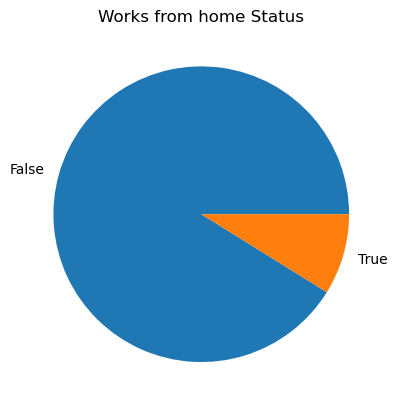

In [4]:
df['job_work_from_home'].value_counts().plot(kind = 'pie')
plt.title('Works from home Status')
plt.ylabel('')
plt.show()

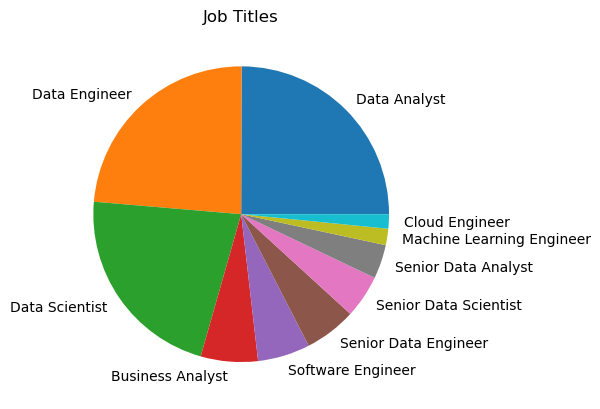

In [8]:
df['job_title_short'].value_counts().plot(kind = 'pie')
plt.title('Job Titles')
plt.ylabel('')
plt.show()

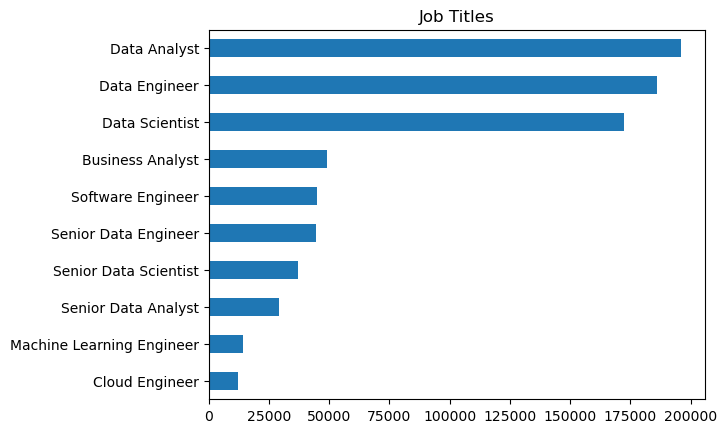

In [9]:
df['job_title_short'].value_counts().plot(kind = 'barh')
plt.gca().invert_yaxis()
plt.title('Job Titles')
plt.ylabel('')
plt.show()

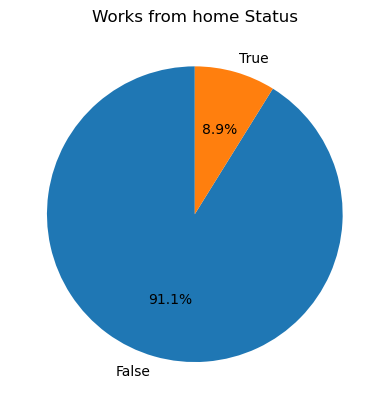

In [13]:
df['job_work_from_home'].value_counts().plot(kind = 'pie', startangle = 90, autopct= '%1.1f%%')
plt.title('Works from home Status')
plt.ylabel('')
plt.show()

In [14]:
df[['job_work_from_home', 'job_no_degree_mention', 'job_health_insurance']]

,job_work_from_home,job_no_degree_mention,job_health_insurance
0,False,False,False
1,False,False,False
2,False,True,False
3,False,False,False
4,True,False,False
...,...,...,...
785735,False,False,False
785736,False,False,False
785737,False,False,False
785738,False,False,False


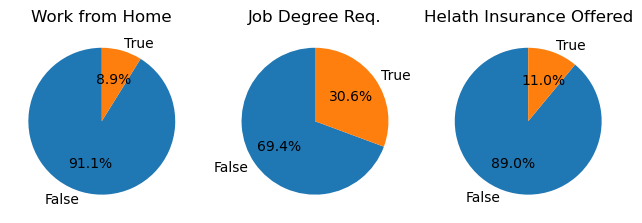

In [34]:
fig, ax = plt.subplots(1,3)

dict_column = {
    'job_work_from_home': 'Work from Home',
    'job_no_degree_mention': 'Job Degree Req.',
    'job_health_insurance': 'Helath Insurance Offered'
}

for i, (column, title) in enumerate(dict_column.items()):
    ax[i].pie(df[column].value_counts(),startangle = 90, autopct= '%1.1f%%', labels=['False', 'True'])
    ax[i].set_title(title)



fig.tight_layout()
plt.show()

In [35]:
df = df[df['job_title_short'] == 'Data Analyst'].copy()

In [37]:
work_from_home = df['job_work_from_home'].value_counts()

<Axes: >

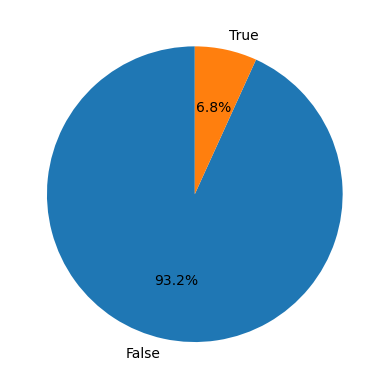

In [41]:
work_from_home.plot(kind='pie', ylabel='', startangle=90, autopct='%1.1f%%')

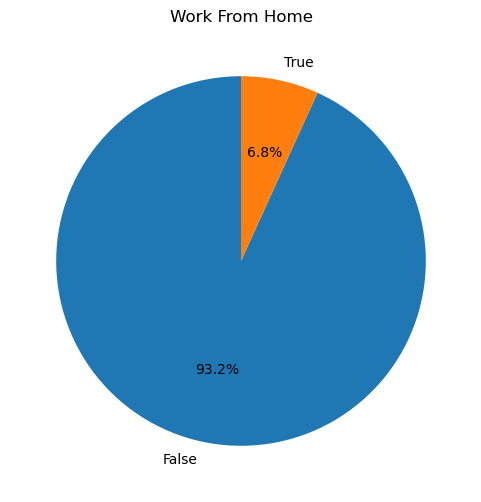

In [46]:
plt.figure(figsize=(6,6))
plt.pie(work_from_home, labels=['False', 'True'], autopct = '%1.1f%%', startangle = 90)
plt.title('Work From Home')
plt.show()

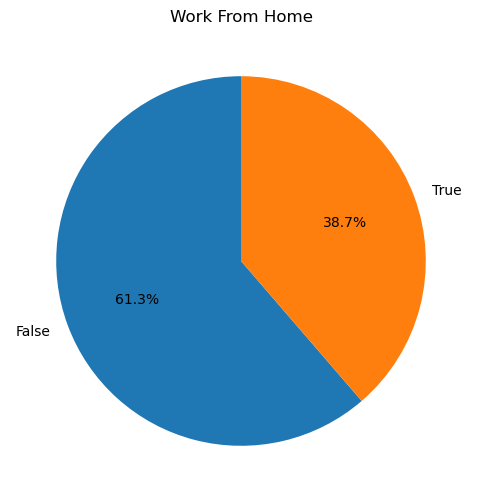

In [54]:
job_no_degree_mention = df['job_no_degree_mention'].value_counts()
plt.figure(figsize=(6,6))
plt.pie(job_no_degree_mention, labels=['False', 'True'], autopct = '%1.1f%%', startangle = 90)
plt.title('Work From Home')
plt.show()

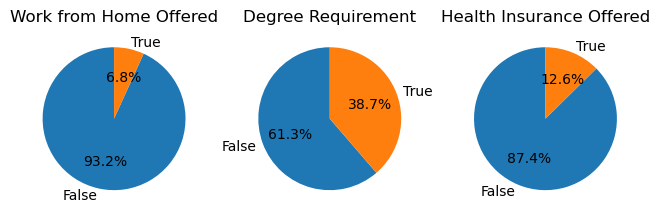

In [52]:
fig, ax = plt.subplots(1,3)
dict_column = {
    'job_work_from_home': 'Work from Home Offered',
    'job_no_degree_mention': 'Degree Requirement',
    'job_health_insurance': 'Health Insurance Offered'
}

for i, (column, title) in enumerate(dict_column.items()):
    ax[i].pie(df[column].value_counts(), labels = ['False', 'True'], autopct='%1.1f%%', startangle=90)
    ax[i].set_title(title)


fig.tight_layout()
plt.show()